# Tracking electrons through the ESRF lattice

## Exercise 2a: ESRF twiss calculation 

/home/vagrant/jupyter/Zgoubi-Workshop/Tutorials/Tuesday/TutTu1/Ex-2-ESRF


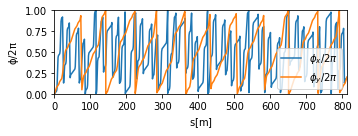

nu_x=36.197428 nu_y=11.202545


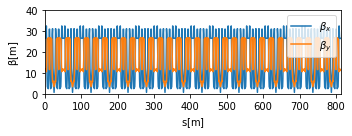

btx(max)=32.56, btx(min)=0.78, 
 bty(max)=27.00, bty(min)=3.50


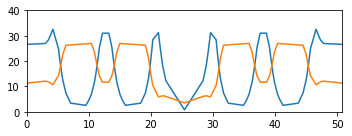

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
FL=os.getcwd()
print FL
S,beta_x,beta_y,phix,phiy=np.loadtxt('%s/%s'%(FL,'zgoubi.TWISS.out'),skiprows=51,usecols=(12,1,3,10,11),unpack=True)

plt.figure(figsize=(5,2))
plt.plot(S,phix,label=r'$\phi_x/2\pi$')
plt.plot(S,phiy,label=r'$\phi_y/2\pi$')
plt.ylim([0,1])
plt.xlim([0,np.max(S)])
plt.legend()
plt.ylabel(r'$\rm\phi/2\pi$')
plt.xlabel(r'$\rm s  [m]$')
plt.tight_layout()
plt.savefig('phi.png')
plt.show()

phix_int=np.abs(np.sum(np.round(np.diff(phix))))
phiy_int=np.abs(np.sum(np.round(np.diff(phiy))))
print 'nu_x=%.6f'%(phix[len(phix)-1]+phix_int),'nu_y=%.6f'%(phiy[len(phiy)-1]+phiy_int)


plt.figure(figsize=(5,2))
plt.plot(S,beta_x,label=r'$\beta_x$')
plt.plot(S,beta_y,label=r'$\beta_y$')
plt.ylim([0,40])
plt.xlim([0,np.max(S)])
plt.legend()
plt.ylabel(r'$\rm\beta  [m]$')
plt.xlabel(r'$\rm s  [m]$')
plt.tight_layout()
plt.savefig('beta.png')
plt.show()

print 'btx(max)=%.2f, btx(min)=%.2f, \n bty(max)=%.2f, bty(min)=%.2f'%(np.max(beta_x), np.min(beta_x), np.max(beta_y), np.min(beta_y))


plt.figure(figsize=(5,2))
plt.plot(S,beta_x,label=r'$\beta_x$')
plt.plot(S,beta_y,label=r'$\beta_y$')
plt.ylim([0,40])
plt.xlim([0,50.8])
#plt.legend()
#plt.ylabel(r'$\rm\beta  [m]$')
#plt.xlabel(r'$\rm s  [m]$')
plt.tight_layout()
plt.savefig('chasman-green.png')
plt.show()

## Exercise 2b: Electron tracking with radiation in ESRF lattice

/home/vagrant/jupyter/Zgoubi-Workshop/Tutorials/Tuesday/TutTu1/Ex-2-ESRF
0.0013
48.6905201033


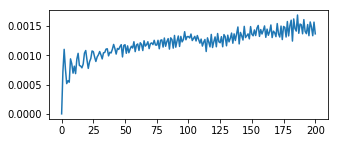

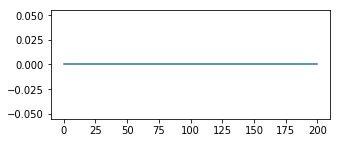

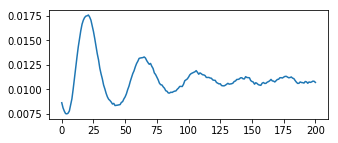

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import math

FL=os.getcwd()
print FL
dm1val,xval,yval,IPASS=np.loadtxt('%s/%s'%(FL,'zgoubi.fai'),skiprows=4,usecols=(8,9,11,37),unpack=True)
xvalmeter=xval/100
yvalmeter=yval/100

numpart=100
numturns=201

epsx=65e-9
betax=26
print(np.sqrt(epsx*betax))
Trev=2.711e-6 #revolution time (s)
taux=0.132e-3 #horizontal damping time (s)
nx=taux/Trev
print(nx)

xvalsturn={}
yvalsturn={}
dm1valsturn={}
xrms=np.zeros(numturns)
yrms=np.zeros(numturns)
dm1rms=np.zeros(numturns)

#print(xvalsturn.shape,xrms.shape,xvalmeter.shape)
for i in range(numturns):
    xvalsturn[i]=xvalmeter[numpart*i:numpart*(i+1)-1]
    yvalsturn[i]=yvalmeter[numpart*i:numpart*(i+1)-1]
    dm1valsturn[i]=dm1val[numpart*i:numpart*(i+1)-1]

    
#xrms=array(numturns)
for i in range(numturns):
    xrms[i]=math.sqrt(sum(xvalsturn[i]*xvalsturn[i])/numpart)
    yrms[i]=math.sqrt(sum(yvalsturn[i]*yvalsturn[i])/numpart)
    dm1rms[i]=math.sqrt(sum(dm1valsturn[i]*dm1valsturn[i])/numpart)

    
plt.figure(figsize=(5,2))
plt.plot(xrms,label=r'$x_{rms}$')
plt.show()

plt.figure(figsize=(5,2))
plt.plot(yrms,label=r'$y_{rms}$')
plt.show()

plt.figure(figsize=(5,2))
plt.plot(dm1rms,label=r'$\frac{dp}{p}_{rms}$')
plt.show()